In [ ]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model  # Сеть прямого распространения

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam  # оптимизатор
from tensorflow.keras import utils # Используем для to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory # Для отрисовки изображений

from google.colab import drive  # подключем диск
from google.colab import files  # Для загрузки своей картинки

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Nuts/Nuts/train'
validation_path = '/content/drive/MyDrive/Nuts/Nuts/val'
test_path =  '/content/drive/MyDrive/Nuts/Nuts/test'

In [ ]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes',
       labelweight='bold',
       labelsize='large',
       titleweight='bold',
       titlesize=18,
       titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

ds_train_ = image_dataset_from_directory(train_path,
                                         labels='inferred',
                                         label_mode='categorical',
                                         image_size=[128, 128],
                                         interpolation='nearest',
                                         batch_size=64,
                                         shuffle=True)

ds_valid_ = image_dataset_from_directory(validation_path,
                                         labels='inferred',
                                         label_mode='categorical',
                                         image_size=[128, 128],
                                         interpolation='nearest',
                                         batch_size=64,
                                         shuffle=False)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = (ds_train_
            .map(convert_to_float)
            .cache()
            .prefetch(buffer_size=AUTOTUNE))

ds_valid = (ds_valid_
            .map(convert_to_float)
            .cache()
            .prefetch(buffer_size=AUTOTUNE))

Found 1320 files belonging to 11 classes.
Found 440 files belonging to 11 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation='relu',
                 padding='same',
                 input_shape=[128, 128, 3]))
model.add(Conv2D(filters=128,
                 kernel_size=3,
                 activation='relu',
                 padding='same'))
model.add(Flatten())
model.add(Dense(11, activation='softmax'))

optimizer = Adam(epsilon=0.01)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'],)

In [ ]:
history = model.fit(ds_train,
                    validation_data=ds_valid,
                    epochs=30)

Epoch 1/30
21/21 [==============================] - 372s 14s/step - loss: 3.6057 - categorical_accuracy: 0.0977 - val_loss: 2.3849 - val_categorical_accuracy: 0.1614
Epoch 2/30
21/21 [==============================] - 185s 9s/step - loss: 2.3686 - categorical_accuracy: 0.1470 - val_loss: 2.2993 - val_categorical_accuracy: 0.2273
Epoch 3/30
21/21 [==============================] - 192s 9s/step - loss: 2.1725 - categorical_accuracy: 0.2432 - val_loss: 1.9280 - val_categorical_accuracy: 0.2795
Epoch 4/30
21/21 [==============================] - 192s 9s/step - loss: 1.7011 - categorical_accuracy: 0.3932 - val_loss: 1.5359 - val_categorical_accuracy: 0.4250
Epoch 5/30
21/21 [==============================] - 188s 9s/step - loss: 1.3569 - categorical_accuracy: 0.5545 - val_loss: 1.3558 - val_categorical_accuracy: 0.5114
Epoch 6/30
21/21 [==============================] - 198s 9s/step - loss: 1.1442 - categorical_accuracy: 0.6167 - val_loss: 1.1165 - val_categorical_accuracy: 0.6295
Epoch 7/3

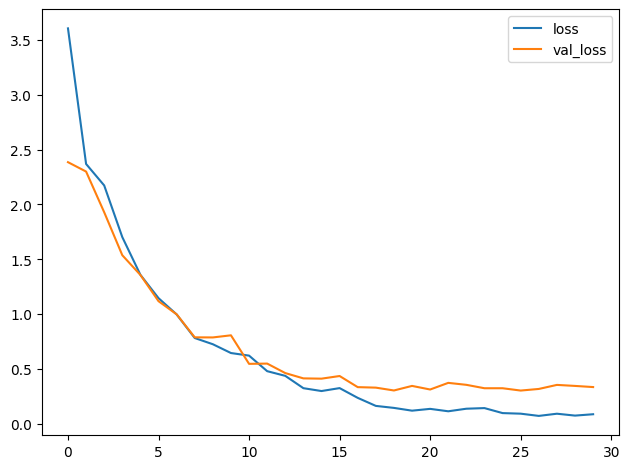

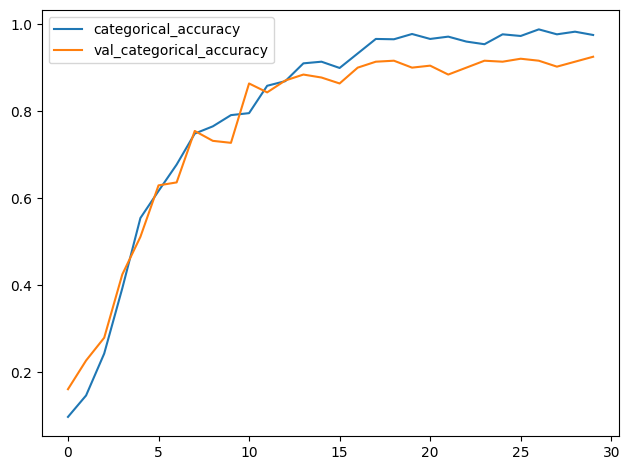

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();

In [ ]:
model.save('nut_classifier.h5')

In [ ]:
model_path = '/content/drive/MyDrive/nut_classifier.h5'
model = load_model(model_path)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 flatten (Flatten)           (None, 2097152)           0         
                                                                 
 dense (Dense)               (None, 11)                23068683  
                                                                 
Total params: 23,144,331
Trainable params: 23,144,331
Non-trainable params: 0
_________________________________________________________________
